<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/_ry_From%20regression%20to%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From Regression to RNN

Learning objectives:
* [Objective 1] ARIMA
* [Objective 2] RNN requires a 3-D tensor as input
* [Objective 3] Stock data
* [Objective 4] Create the training and test data for RNN/LSTM
* [Objective 5] Run a simple RNN model
* [Objective 6] RNN/LTSM requires normalized input data
* [Objective 7] LSTM
* [Objective 8] LSTM Regularization
* [Objective 9] GRU
* [Objective 10] GRU Regularization

Note: Every run of the following code may vary.

## Ref:
- https://medium.com/swlh/a-technical-guide-on-rnn-lstm-gru-for-stock-price-prediction-bce2f7f30346

- https://github.com/dataman-git/codes_for_articles/blob/master/From%20regression%20to%20RNN.ipynb


In [32]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### [Learning Objective 1] ARIMA()

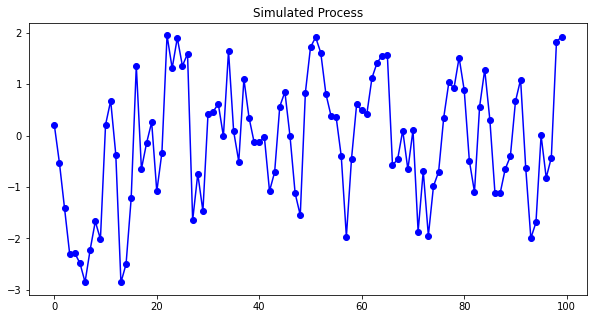

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Generate the data
import numpy as np
ar = np.array([1, -0.8, 0.2])
ma = np.array([1])
my_simulation = ArmaProcess(ar, ma).generate_sample(nsample=100)

plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.title("Simulated Process")
plt.show()

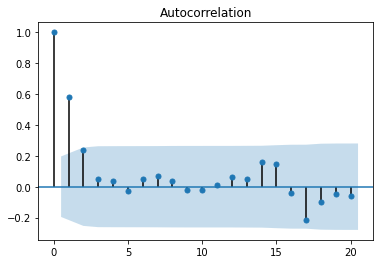

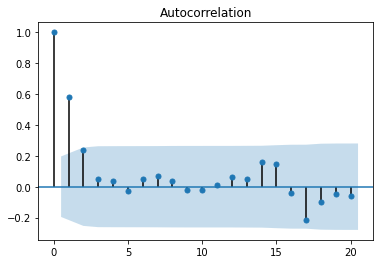

In [34]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
plot_acf(my_simulation)

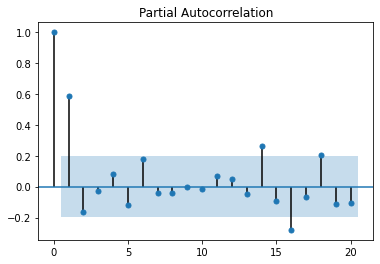

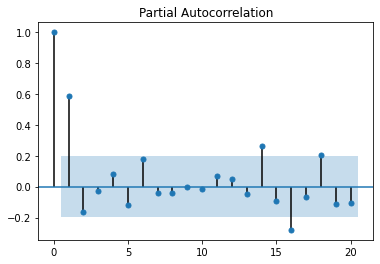

In [35]:
plot_pacf(my_simulation)

In [36]:
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

#mod = sm.tsa.arima.ARIMA(my_simulation, order=(2, 0, 0))

mod = sm.tsa.ARIMA(my_simulation, order=(2, 0, 0))

mod_fit = mod.fit()
print(mod_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 0)   Log Likelihood                -140.040
Method:                       css-mle   S.D. of innovations              0.979
Date:                Sat, 12 Jun 2021   AIC                            288.080
Time:                        19:16:38   BIC                            298.500
Sample:                             0   HQIC                           292.297
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1068      0.206     -0.518      0.606      -0.511       0.298
ar.L1.y        0.6820      0.099      6.904      0.000       0.488       0.876
ar.L2.y       -0.1536      0.100     -1.540      0.1

### [Learning Objective 2] RNN requires a 3-D tensor as input
* Tensor: One tensor is a vector that enters the model
* Time Step: One time step is one observation in the tensor.
* Feature: One feature is one observation at a time step.

In [37]:
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))
array

array([0.48632534, 0.51893371, 0.46563465, 0.90232709, 0.40828483,
       0.02125355, 0.19411639, 0.1859736 , 0.4089628 , 0.8960054 ,
       0.94317638, 0.64298779, 0.088107  , 0.60064848, 0.8150729 ,
       0.55232292, 0.4811806 , 0.77761123, 0.87115429, 0.38477323])

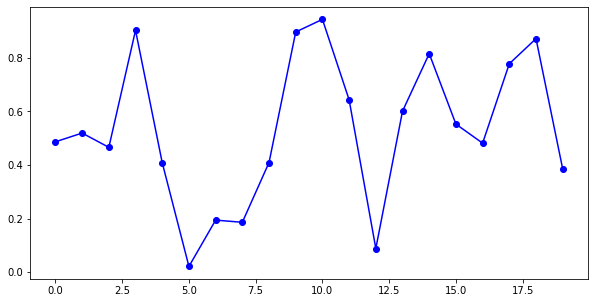

In [38]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(array, linestyle='-', marker='o', color='b')
plt.show()

In [39]:
array.reshape((4,5,1))

array([[[0.48632534],
        [0.51893371],
        [0.46563465],
        [0.90232709],
        [0.40828483]],

       [[0.02125355],
        [0.19411639],
        [0.1859736 ],
        [0.4089628 ],
        [0.8960054 ]],

       [[0.94317638],
        [0.64298779],
        [0.088107  ],
        [0.60064848],
        [0.8150729 ]],

       [[0.55232292],
        [0.4811806 ],
        [0.77761123],
        [0.87115429],
        [0.38477323]]])

In [40]:
array.reshape((2,5,2))

array([[[0.48632534, 0.51893371],
        [0.46563465, 0.90232709],
        [0.40828483, 0.02125355],
        [0.19411639, 0.1859736 ],
        [0.4089628 , 0.8960054 ]],

       [[0.94317638, 0.64298779],
        [0.088107  , 0.60064848],
        [0.8150729 , 0.55232292],
        [0.4811806 , 0.77761123],
        [0.87115429, 0.38477323]]])

In [41]:
# Example 1
array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))

# Example 2
array.reshape((4,5,1))

# Example 3
array.reshape((2,5,2))

array([[[0.34308525, 0.67450543],
        [0.26817674, 0.05538027],
        [0.51684381, 0.23530607],
        [0.96760888, 0.81458011],
        [0.74599752, 0.16079701]],

       [[0.01193818, 0.37331424],
        [0.73130734, 0.35796386],
        [0.07290293, 0.17246853],
        [0.56479424, 0.43956431],
        [0.00814873, 0.67404661]]])

* use numpy to store and manipulate image data. 
* We will use the Python Imaging library (PIL) to read and write data to standard file formats.
* 4 lines of pixels, each line of pixels contains 5 pixels, and each pixel contains 3 bytes (red, green, blue)
* The shape of the array is: height x width x 3.

In [42]:
# IF it is image data:
# Create an RGB image that is 3 dimensional arrays of 8-bit unsigned integers.
width = 5
height = 4
RGB = 3
p = width * height * RGB
img_data = np.random.randint(100,high=255, size=p, dtype=np.uint8) # Generate values in (100,255)
img_data = img_data.reshape((height, width, RGB))
img_data

array([[[241, 170, 163],
        [136, 169, 143],
        [191, 164, 127],
        [139, 109, 241],
        [100, 225, 237]],

       [[221, 251, 217],
        [192, 209, 130],
        [116, 234, 140],
        [112, 213, 143],
        [122, 187, 217]],

       [[150, 224, 185],
        [218, 156, 114],
        [211, 145, 167],
        [126, 228, 149],
        [161, 221, 188]],

       [[126, 226, 141],
        [244, 140, 131],
        [177, 142, 140],
        [148, 211, 144],
        [232, 190, 143]]], dtype=uint8)

In [43]:
from PIL import Image
img = Image.fromarray( img_data)
img.show()

### [Learning Objective 3] Stock data

In [44]:
try:
  import yfinance as yf
except:
  !pip install yfinance

try:
  from yahoofinancials import YahooFinancials
except:
  !pip install yahoofinancials
  

In [45]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
AMZN = yf.download('AMZN', 
                      start='2013-01-01', 
                      end='2019-12-31', 
                      progress=False)
# AMZN = yf.download('AMZN') for all 
all_data = AMZN[['Adj Close','Open', 'High', 'Low', 'Close', 'Volume']].round(2)
all_data.head(10)


,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
2013-01-02,257.31,256.08,258.10,253.26,257.31,3271000
2013-01-03,258.48,257.27,260.88,256.37,258.48,2750900
2013-01-04,259.15,257.58,259.80,256.65,259.15,1874200
2013-01-07,268.46,262.97,269.73,262.67,268.46,4910000
2013-01-08,266.38,267.07,268.98,263.57,266.38,3010700
2013-01-09,266.35,268.17,269.50,265.40,266.35,2265600
2013-01-10,265.34,268.54,268.74,262.30,265.34,2863400
2013-01-11,267.94,265.10,268.43,264.11,267.94,2413300
2013-01-14,272.73,268.00,274.26,267.54,272.73,4275000


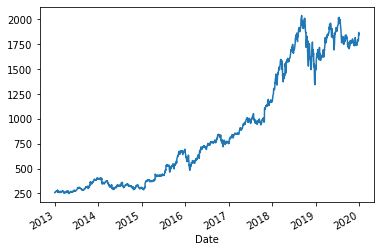

In [46]:
all_data['Adj Close'].plot()

In [47]:
print("There are "+ str(all_data[:'2018'].shape[0]) + " observations in the training data")
print("There are "+ str(all_data['2019':].shape[0]) + " observations in the test data")

There are 1510 observations in the training data
There are 251 observations in the test data


## [Learning objective 4] Create the training and test data for RNN/LSTM

In [48]:
def ts_train_test(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test  = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test = ts_train_test(all_data,5,2)
X_train.shape[0],X_train.shape[1]

(1504, 5)

In [49]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0],X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see],axis=1)

,0,1,2,3,4,0,1
0,257.31,258.48,259.15,268.46,266.38,266.35,265.34
1,258.48,259.15,268.46,266.38,266.35,265.34,267.94
2,259.15,268.46,266.38,266.35,265.34,267.94,272.73
3,268.46,266.38,266.35,265.34,267.94,272.73,271.90
4,266.38,266.35,265.34,267.94,272.73,271.90,268.93
...,...,...,...,...,...,...,...
1499,1591.91,1520.91,1551.48,1495.08,1460.83,1377.45,1343.96
1500,1520.91,1551.48,1495.08,1460.83,1377.45,1343.96,1470.90
1501,1551.48,1495.08,1460.83,1377.45,1343.96,1470.90,1461.64
1502,1495.08,1460.83,1377.45,1343.96,1470.90,1461.64,1478.02


In [50]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0],X_test.shape[1])))
pd.DataFrame(X_test_see)

,0,1,2,3,4
0,1343.96,1470.90,1461.64,1478.02,1501.97
1,1470.90,1461.64,1478.02,1501.97,1539.13
2,1461.64,1478.02,1501.97,1539.13,1500.28
3,1478.02,1501.97,1539.13,1500.28,1575.39
4,1501.97,1539.13,1500.28,1575.39,1629.51
...,...,...,...,...,...
244,1760.33,1760.94,1769.21,1790.66,1784.03
245,1760.94,1769.21,1790.66,1784.03,1792.28
246,1769.21,1790.66,1784.03,1792.28,1786.50
247,1790.66,1784.03,1792.28,1786.50,1793.00


In [51]:
print("There are " + str(X_train.shape[0]) + " samples in the training data")
print("There are " + str(X_test.shape[0]) + " samples in the test data")

There are 1504 samples in the training data
There are 249 samples in the test data


## [Learning objective 5] Run a simple RNN model

In [52]:
def simple_rnn_model(X_train, y_train, X_test):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)

    return my_rnn_model, rnn_predictions

my_rnn_model, rnn_predictions = simple_rnn_model(X_train, y_train, X_test)
rnn_predictions[1:10]

array([[40.255997, 41.656677],
       [40.255997, 41.656677],
       [40.255997, 41.656677],
       [40.255997, 41.656677],
       [40.255997, 41.656677],
       [40.255997, 41.656677],
       [40.255997, 41.656677],
       [40.255997, 41.656677],
       [40.255997, 41.656677]], dtype=float32)

(3066294.2, <matplotlib.axes._subplots.AxesSubplot at 0x7f0a6e52b390>)

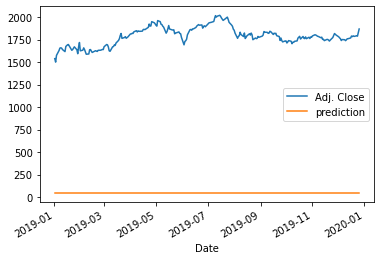

In [53]:
def actual_pred_plot(preds):
    actual_pred = pd.DataFrame(columns = ['Adj. Close', 'prediction'])
    actual_pred['Adj. Close'] = all_data.loc['2019':,'Adj Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['Adj. Close']),np.array(actual_pred['prediction']))
    
    return (m.result().numpy(), actual_pred.plot() )
    
actual_pred_plot(rnn_predictions)  

## [Learning objective 6] RNN/LTSM requires normalized input data

(1792.2067, <matplotlib.axes._subplots.AxesSubplot at 0x7f0a6d819850>)

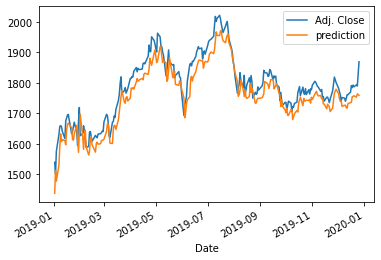

In [54]:
def ts_train_test_normalize(all_data,time_steps,for_periods):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test  = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adj Close"]['2019':]),axis=0).values
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

def simple_rnn_model(X_train, y_train, X_test, sc):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler
    rnn_predictions = sc.inverse_transform(rnn_predictions)

    return my_rnn_model, rnn_predictions


X_train, y_train, X_test, sc = ts_train_test_normalize(all_data,5,2)
my_rnn_model, rnn_predictions_2 = simple_rnn_model(X_train, y_train, X_test, sc)
rnn_predictions_2[1:10]
actual_pred_plot(rnn_predictions_2)   

## [Learning objective 7] LSTM

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(1839.4159, <matplotlib.axes._subplots.AxesSubplot at 0x7f0a6c1a6f90>)

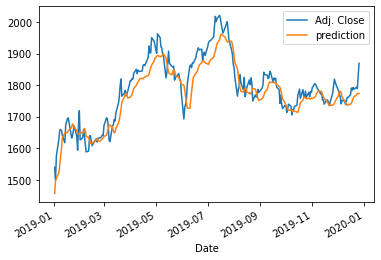

In [55]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)   

## [Learning objective 8] LSTM Regularization

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(2807.2466, <matplotlib.axes._subplots.AxesSubplot at 0x7f0a7330efd0>)

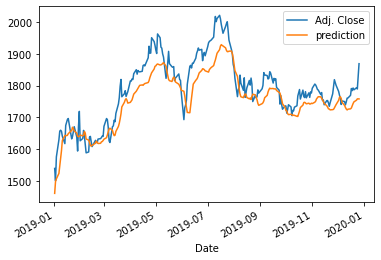

In [56]:
def LSTM_model_regularization(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model_regularization(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)  

## [Learning objective 9] GRU

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(1304.6077, <matplotlib.axes._subplots.AxesSubplot at 0x7f0a76ffc290>)

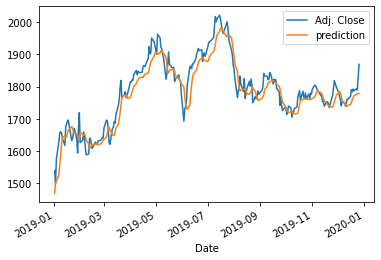

In [57]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dense(units=2))

    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction[1:10]
actual_pred_plot(GRU_prediction)  

## [Learning objective 10] GRU Regularization

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(1304.6077, <matplotlib.axes._subplots.AxesSubplot at 0x7f0a79b195d0>)

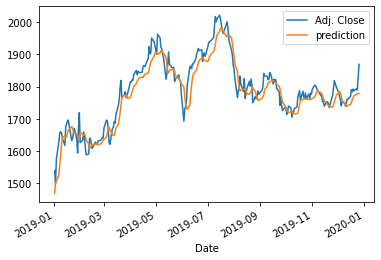

In [58]:
def GRU_model_regularization(X_train, y_train, X_test, sc):
    '''
    create GRU model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    from keras.layers import Dropout
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Second GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    
    # Third GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Fourth GRU layer
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # The output layer
    my_GRU_model.add(Dense(units=1))
    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_predictions = my_GRU_model.predict(X_test)
    GRU_predictions = sc.inverse_transform(GRU_predictions)

    return my_GRU_model, GRU_predictions

my_GRU_model, GRU_predictions = GRU_model_regularization(X_train, y_train, X_test, sc)
GRU_predictions[1:10]
actual_pred_plot(GRU_prediction)  